## 1. Single coin toss (Classical Computer)

In the single coin toss game with bits, the player chooses the side of the coin with which the player wants to start before tossing the coin once and recording the result.

Before playing the first game we first have to import the function random. Additionally, we also import pyplot from matplotlibrary to visualize our results.

To be able to run the code on your own, please open a new file in your IBM Quantum Lab and copy every step of the following code and execute it. 

In [1]:
import matplotlib.pyplot as plt
import random

The following code is used to define a function which enables us to play the coin toss game where a coin is always tossed once. The function includes the most important variables and game rules such as the initial coin state as well as the winning goal. 
The random function is used to simulate the fair coin toss and can return 0s and 1s. When the random function returns 0 it indicates that the coin landed on the side which was initially chosen by the player. On the other hand, 1 means that the coin is flipped.
This rule is captured by the if / else if condition in the code, which states that if the initial coin state that was chosen is “Heads” each 0 means that the recorded result is “Heads”. However, when the random function returns 1, the result recorded in this example would be “Tails”. If the initial coin state that was chosen is “Tails” the rule works in the same way. 

The command at the end of the code calculates the percentage of “Heads” vs. “Tails” as outcomes and visualizes the results by using a plot. 

In [2]:
def single_coin_toss():    
    initial_coin_state = input('Type "Heads" or "Tails" to select the inital coin state: ')
    
    nr_of_flips = int(input('Enter the number of times you want to repeat the coin toss game: '))
                
    samples = [random.randint(0, 1) for i in range(nr_of_flips)]
    
    if initial_coin_state == 'Heads':
        heads = samples.count(0)
        tails = samples.count(1)
    elif initial_coin_state == 'Tails': 
        tails = samples.count(0)
        heads = samples.count(1)        

    print("Heads count=%d, Tails count=%d" % (heads, tails))
    
    names = ['Heads', 'Tails']
    
    values = [heads/nr_of_flips, tails/nr_of_flips]
    plt.bar(names, values)
    plt.ylabel('Probability')

After entering the function and executing it, the code will ask you if you would like to choose “Heads” or “Tails” as the initial coin state. In the next step you are asked to enter the number of times the coin toss game should be repeated. Please make sure that you write “Heads” and “Tails” properly (with capital letter in the beginning) to avoid a misfunctioning of the code. 
As a result, you will receive a plot which visualizes how often “Tails” and “Heads” occur.

Type "Heads" or "Tails" to select the inital coin state:  Heads
Enter the number of times you want to repeat the coin toss game:  10000


Heads count=5000, Tails count=5000


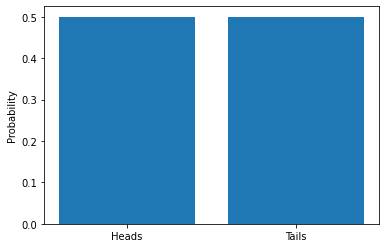

In [3]:
single_coin_toss()

Repeat the function five times in your own file while variing the number of flips as well as the initial coin state and track the results. What do you notice?

Don’t worry if your results are never exactly equally distributed. As you know from statistics the result will get closer with increasing number of trials until a perfect distribution would be reached. 

## 2. Double coin toss (Classical Computer)

In the next experiment a fair coin is tossed two times in a row and the result is measured after the second toss. You might think this exercise is a repitition of the first experiment, however it’s purpose will become clearer when playing the same game with a quantum coin.

Similar to the first exercise please execute the double_coin_toss function. 
The main difference in the code can be noticed when comparing the if / else if condition in the function. It basically says that if the initial coin state is “Heads” we can record “Heads” as a result under the following circumstances: 
    o The random function returns 0 for both tosses 
    o The random function returns 1 for both tosses

However, when the random function returns 1 for one of both tosses the recorded result will be “Tails”. 

In case the initial coin state that was chosen is “Tails” the if else condition works in the same way. 

In [4]:
def double_coin_toss():
    initial_coin_state = input('Type "Heads" or "Tails" to select the inital coin state: ')
    
    nr_of_flips = int(input('Enter the number of times you want to repeat the coin toss game: '))
                
    coin_results = [0] * nr_of_flips;
    
    for c in range (nr_of_flips):
    
        samples = [random.randint(0, 1) for c in range(2)]
                
        if initial_coin_state == 'Heads':
            if samples[0] == 1 and samples [1] == 1 or samples[0] == 0 and samples [1] == 0:
                coin_results[c] = 0; 
            elif samples[0] == 1 and samples [1] == 0 or samples[0] == 0 and samples [1] == 1:
                coin_results[c] = 1; 
        elif initial_coin_state == 'Tails':
            if samples[0] == 1 and samples [1] == 1 or samples[0] == 0 and samples [1] == 0:
                coin_results[c] = 1; 
            elif samples[0] == 1 and samples [1] == 0 or samples[0] == 0 and samples [1] == 1:
                coin_results[c] = 0;                 
        
    heads = coin_results.count(0);
    tails = coin_results.count(1);
    
    print("Heads count=%d, Tails count=%d" % (heads, tails))
    
    names = ['Heads', 'Tails']
        
    values = [heads/nr_of_flips, tails/nr_of_flips]
    plt.bar(names, values)
    plt.ylabel('Probability')

Type in the function name, execute the code, choose the initial coin state and enter the number of times you want to repeat the double coin toss game.
Similar to the first experiment the results of the double coin toss game will be visualized in a graph. Please compare this result to the single coin toss experiment – what do you notice?

Type "Heads" or "Tails" to select the inital coin state:  Heads
Enter the number of times you want to repeat the coin toss game:  10000


Heads count=4953, Tails count=5047


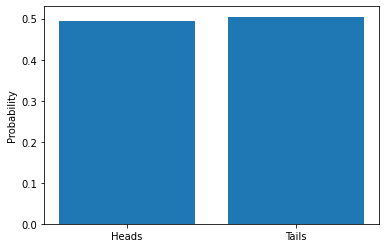

In [5]:
double_coin_toss()

## 3. Single coin toss (Quantum Computer)

Now we will execute a code for the same game by using a quantum simulator. Instead of working with bits like in the first two exercises we now use qubits to play the game. This change will lead to differences in the outcome – so be careful when analyzing the results. 

To get in touch with quantum let’s start with importing the required tools with the code below: QASM simulator, Visualization, matplotlib.pyplot and load the account information. QASM simulator will allow us to execute the game like on a real quantum device. 

In [6]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

#Load account information 
IBMQ.load_account()
provider = IBMQ.get_provider()

With the code below, we first create a quantum circuit with only one single qubit.
single_quantum_coin_toss is the name of the function that will define the most important variables of our quantum game.
qc1 is the name of the quantum circuit and (1,1) indicates that we are about to create one qubit and one classical bit to measure the state of the qubit. You will learn in the next tutorials why it is not possible to measure qubits by themselves. 
Similar to bits, qubits can have the states 0 and 1. As learned in assignment 1, in quantum physics a phenomenon called superposition allows the qubit to have any state between 0 and 1. In our function this superposition is reached by executing a Hadamard-gate with the command “qc1.h(0)”. If you have problems to imagine this situation, think about a coin which is flipped. Superposition can be imagined as the condition when the coin is in the air. At this point the outcome is uncertain as the coin can either land on “Heads” or “Tails”. Only after measuring the qubit with the command qc1.measure(0,0) we know the final outcome. A Hadamard-gate is an operation to manipulate the states of qubits, you will learn more about quantum gates in Assignment 4.
Another side note is that the initial state of a qubit is always zero – which we refer to “Heads” in our experiment. To be able to start our experiment with a coin showing “Tails” we need to change the state of the qubit to 1 by applying a X-gate with the command qc1.x(0).

In [7]:
def single_quantum_coin_toss(): 
    qc1 = QuantumCircuit(1,1)
    
    initial_coin_state = input('Type "Heads" or "Tails" to select the inital coin state: ')
    
    nr_of_flips = int(input('Enter the number of times you want to repeat the coin toss game: '))
    
    if initial_coin_state == "Heads": 
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.measure(0,0)
    elif initial_coin_state == "Tails": 
        qc1.x(0) #Change qubit from Heads to Tails 
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.measure(0,0)    

    backend = Aer.get_backend('qasm_simulator')

    job = execute(qc1, backend, shots=nr_of_flips)

    print(job.result().get_counts())

Similar to the normal coin toss exercise, you need to execute the function. Then you are again asked to choose the initial coin state and enter the number of times you want to repeat the coin toss. You will receive the result numerically. 
In the example below we chose “Tails” as initial coin state and tossed the coin 10,000 times. In this case “Heads” appeared 5,055 times while the coin landed on “Tails” for 4,945 times

In [8]:
single_quantum_coin_toss()

Type "Heads" or "Tails" to select the inital coin state:  Tails
Enter the number of times you want to repeat the coin toss game:  10000


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'1': 4945, '0': 5055}


To visualize your results, you have to adapt the variable “values” in the following code. The denominator (in this example 10,000) of both fractions is the number of times you decided to repeat the coin toss game. The numerator of the first fraction corresponds to the number of times the coin showed “Heads” and consequently the numerator of the second fraction equals the number of times the coin showed “Tails”.

Text(0, 0.5, 'Probability')

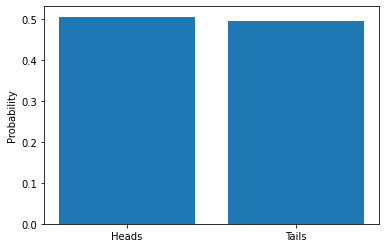

In [9]:
names = ['Heads', 'Tails']
        
values = [5055/10000, 4945/10000] 

plt.bar(names, values)
plt.ylabel('Probability')

Do you notice any difference compared to the single coin toss experiment with the normal coin? Discuss your thoughts with your team.
We can conclude that in a single quantum coin toss experiment the probability of winning or losing is exactly the same compared to the normal coin toss experiment. 

## 4. Double coin toss (Quantum Computer)

Now we will program the game one more time but now we will toss the quantum coin two times in a row and record the result after the second toss.

When you compare the code for the single quantum coin toss function with the function below, you will notice that the only difference is that in the double quantum coin toss function we apply two Hadamard-gates on the same qubit. Using two instead of one Hadamard-gate illustrates that the coin is tossed twice and not only one time as in the previous section.  

In [10]:
def double_quantum_coin_toss(): 
    qc1 = QuantumCircuit(1,1)
    
    initial_coin_state = input('Type "Heads" or "Tails" to select the inital coin state: ')
    
    nr_of_flips = int(input('Enter the number of times you want to repeat the coin toss game: '))
    
    if initial_coin_state == "Heads": 
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.measure(0,0)
    elif initial_coin_state == "Tails": 
        qc1.x(0) #Change qubit to Tails 
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.h(0) #A Hadamard gate that creates a superposition
        qc1.measure(0,0)
              
    backend = Aer.get_backend('qasm_simulator')

    job = execute(qc1, backend, shots=nr_of_flips)
    
    result = job.result().get_counts()
    
    print(job.result().get_counts())

Execute the function, choose between “Heads” or “Tails” and enter the number of repititions like before. 

In [11]:
double_quantum_coin_toss()

Type "Heads" or "Tails" to select the inital coin state:  Tails
Enter the number of times you want to repeat the coin toss game:  10000


{'1': 10000}


Let’s visualize the results again by adapting the “values” variable.

Text(0, 0.5, 'Probability')

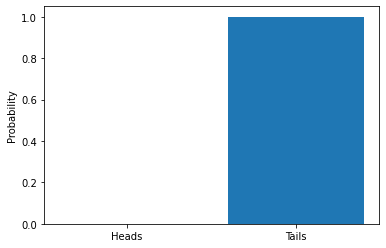

In [12]:
names = ['Heads', 'Tails']
        
values = [0/10000, 10000/10000]

plt.bar(names, values)
plt.ylabel('Probability')

Repeat the double coin toss experiment with qubits at least once and choose the opposite initial coin state. What do you notice?

To understand the reason for this observation, please go back to your assignment and read the section theoretical background. 